    # Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12.5 <~~ bruh

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    d_{w} Q(w) = - \dfrac{2}{\ell} \left( y - Xw \right)^T X \, dw
$$
$$
    \nabla_{w} Q(w) = -\dfrac{2}{\ell} X^T \left( y - Xw \right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:


\begin{cases}
  h_0 = 0\\
  h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{cases}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{cases}
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    w_{k + 1} = w_{k} - h_{k + 1}
\end{cases}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    G_{kj} &= G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    w_{jk} &= w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)


Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:


\begin{cases}
    m_0 = 0, \quad v_0 = 0; \\
    m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\
    v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\
    \widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{cases}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [110]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [112]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [113]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [114]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/41257/run-report/73069419/


* **StochasticDescent**: https://contest.yandex.ru/contest/41257/run-report/73069487/


* **MomentumDescent**: https://contest.yandex.ru/contest/41257/run-report/73069555/


* **Adam**: https://contest.yandex.ru/contest/41257/run-report/73069584/


* **LinearRegression**: https://contest.yandex.ru/contest/41257/run-report/73069830/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [116]:
data = pd.read_csv('autos.csv')

In [117]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

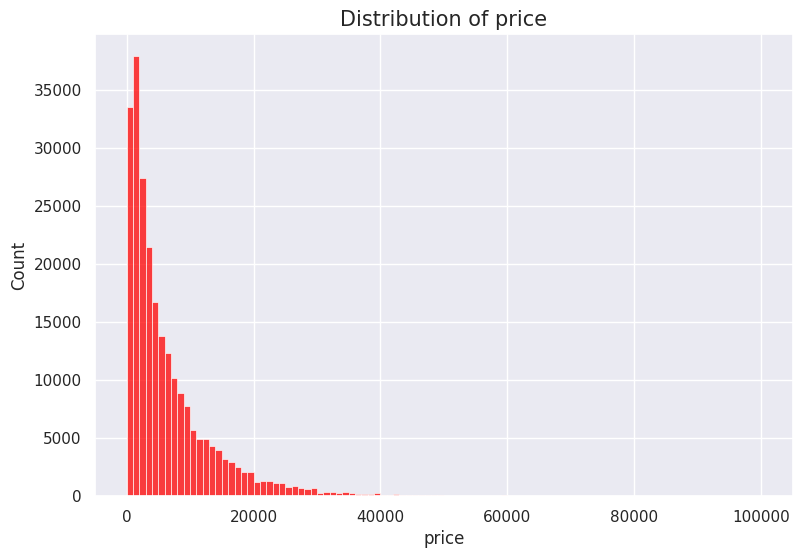

In [118]:
fig, axes = plt.subplots(figsize=(9, 6))
axes.set_title('Distribution of price', fontsize=15)
sns.histplot(data=data['price'], ax=axes, bins=100, color='red')
plt.show()

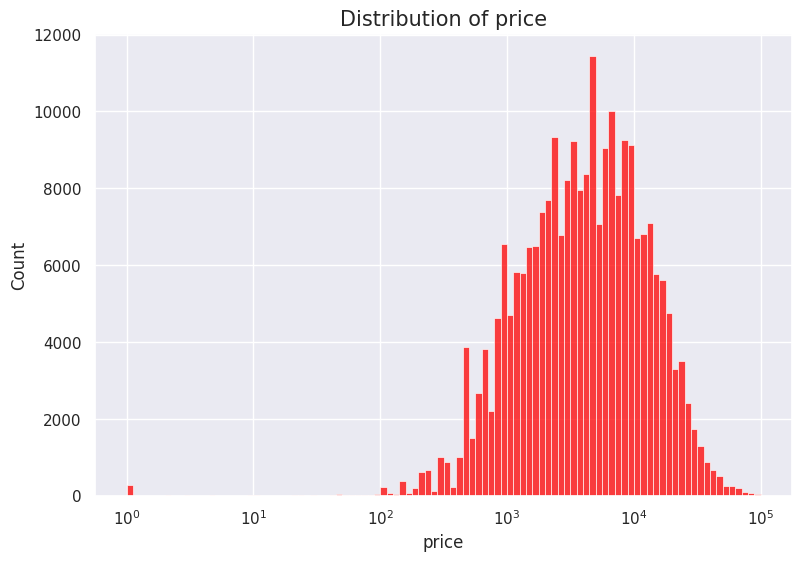

In [119]:
fig, axes = plt.subplots(figsize=(9, 6))
axes.set_title('Distribution of price', fontsize=15)
sns.histplot(data=data['price'], ax=axes, bins=100, log_scale=True, color='red')
plt.show()

Окей, будем смотреть по логарифму таргета.

In [120]:
data['log_price'] = np.log1p(data['price'])

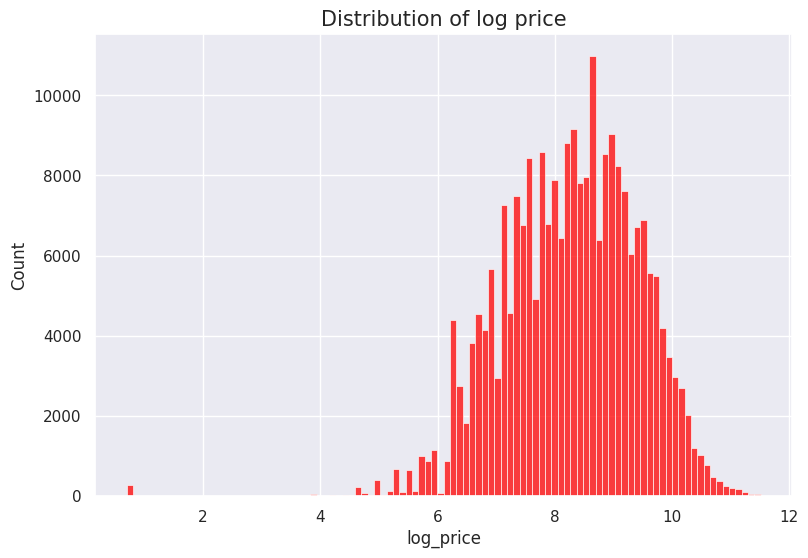

In [121]:
fig, axes = plt.subplots(figsize=(9, 6))
axes.set_title('Distribution of log price', fontsize=15)
sns.histplot(data=data['log_price'], ax=axes, bins=100, color='red')
plt.show()

Кикнем цены ниже log_price = 5, потому что это какой-то кек.

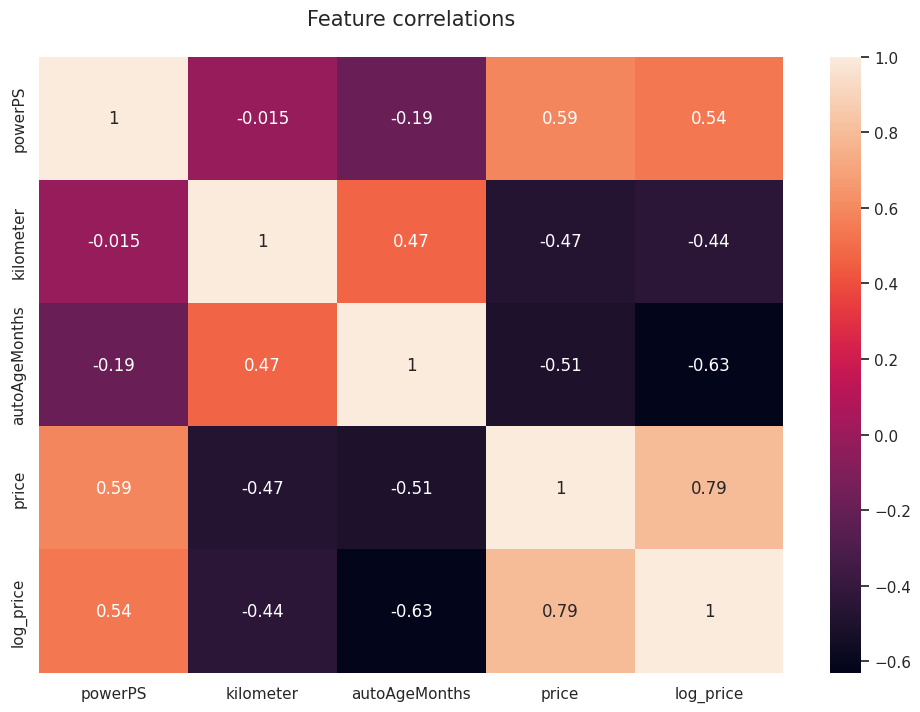

In [122]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(data[['powerPS', 'kilometer', 'autoAgeMonths', 'price', 'log_price']].corr(), ax=ax, annot=True)
ax.set_title('Feature correlations\n', fontsize=15)
plt.show()

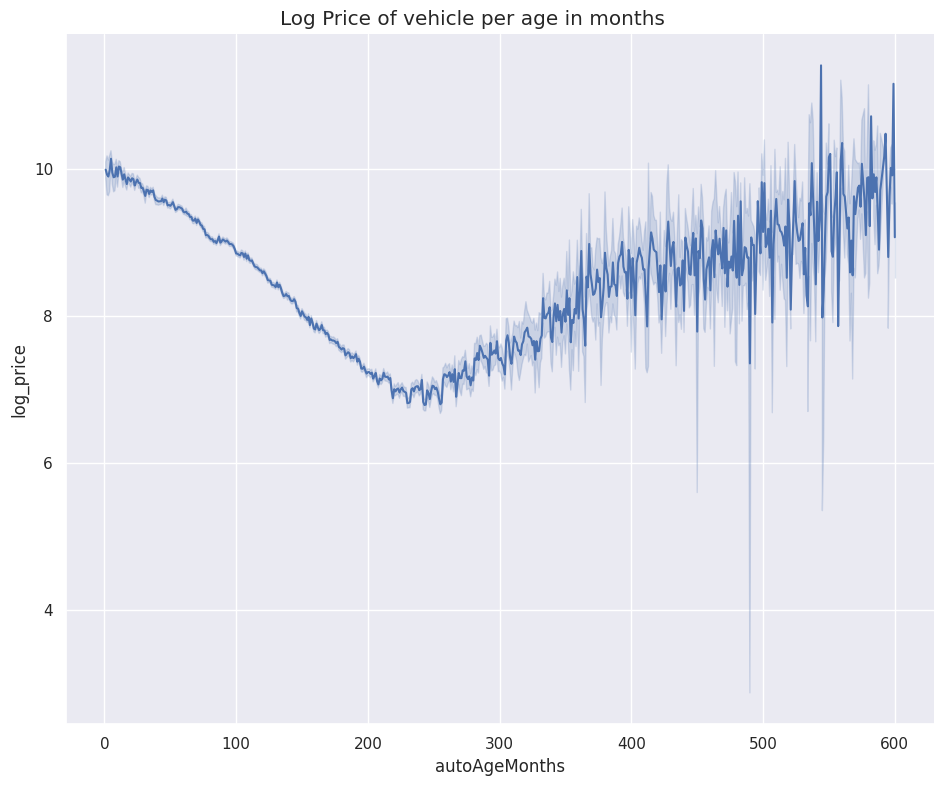

In [123]:
age_price_relplot = sns.relplot(
    data=data, x='autoAgeMonths', y='log_price',
    kind='line', height=8, aspect=1.2, palette='Accent'
)

age_price_relplot.fig.suptitle('Log Price of vehicle per age in months')
plt.subplots_adjust(top=0.95)
age_price_relplot.set_xlabels('autoAgeMonths')
age_price_relplot.set_ylabels('log_price')
plt.show()

Заметен излом зависимости цены от возраста - начиная с 20 лет автомобили переходят в класс раритетов, так что разделим autoAgeMonths на 2 разных признака - в зависимости от винтажности автомобиля (сделаем так, чтобы сохранить линейную зависимость).

In [124]:
data['autoAgeMonths_vintage'] = np.where(data['autoAgeMonths'] > 240, data['autoAgeMonths'], 0)
data['autoAgeMonths_non_vintage'] = np.where(data['autoAgeMonths'] <= 240, data['autoAgeMonths'], 0)
data.drop(labels=['autoAgeMonths'], axis=1, inplace=True)

In [125]:
data[['autoAgeMonths_vintage', 'autoAgeMonths_non_vintage']]

,autoAgeMonths_vintage,autoAgeMonths_non_vintage
0,0,177
1,0,93
2,246,0
3,0,140
4,0,136
...,...,...
241185,0,69
241186,0,142
241187,0,192
241188,241,0


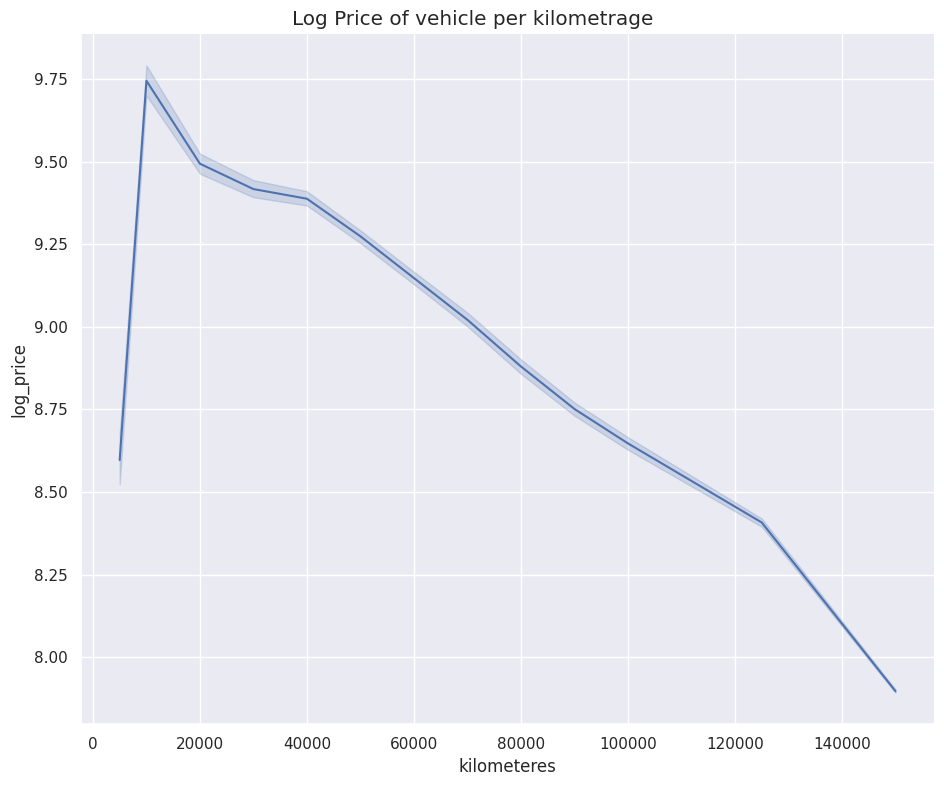

In [126]:
km_price_relplot = sns.relplot(
    data=data, x='kilometer', y='log_price',
    kind='line', height=8, aspect=1.2, palette='Accent'
)

km_price_relplot.fig.suptitle('Log Price of vehicle per kilometrage')
plt.subplots_adjust(top=0.95)
km_price_relplot.set_xlabels('kilometeres')
km_price_relplot.set_ylabels('log_price')
plt.show()

Здесь наблюдается другая тенденция: БУ машины с достаточно малым пробегом в среднем намного дороже. Это можно объяснить тем, что дешёвые машины работяги покупают вдолгую, это их основной конь. Богатые же покупают мерседесы выходного дня, после чего предпочитают продавать их, накатав всего 15000 пробега. Тем не менее, стоит учитывать перепродажи обычных автомобилей с почти что нулевым пробегом. Поэтому разобьём признак пробега на 3 отрезка: [0, 10000), [10000, 40000), [40000, +inf).

In [127]:
data['kilometer_new'] = np.where(data['kilometer'] < 10000, data['kilometer'], 0)
data['kilometer_almost_new'] = np.where((10000 <= data['kilometer']) & (data['kilometer'] < 40000), data['kilometer'], 0)
data['kilometer_old'] = np.where(data['kilometer'] >= 40000, data['kilometer'], 0)
data.drop(labels=['kilometer'], axis=1, inplace=True)

In [128]:
data[['kilometer_new', 'kilometer_almost_new', 'kilometer_old']]

,kilometer_new,kilometer_almost_new,kilometer_old
0,0,0,150000
1,0,0,90000
2,0,0,150000
3,0,0,150000
4,0,0,150000
...,...,...,...
241185,0,0,150000
241186,0,0,150000
241187,0,0,125000
241188,0,0,150000


In [129]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer_new', 'kilometer_almost_new', 'kilometer_old',
           'autoAgeMonths_vintage', 'autoAgeMonths_non_vintage']
other = []

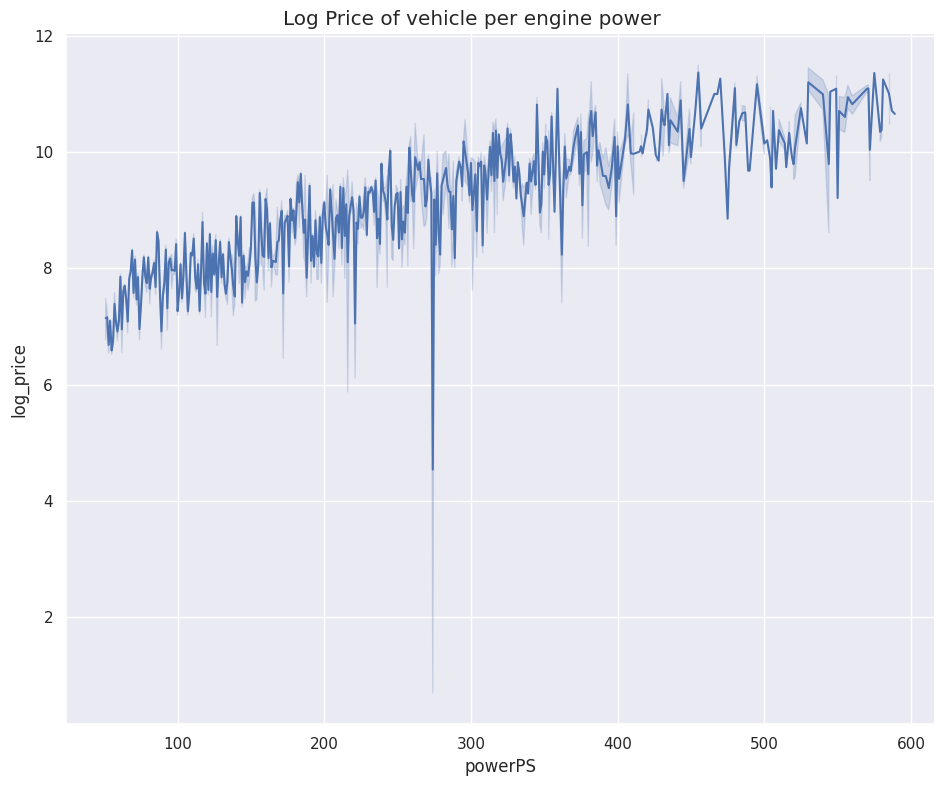

In [130]:
power_price_relplot = sns.relplot(
    data=data, x='powerPS', y='log_price',
    kind='line', height=8, aspect=1.2, palette='Accent'
)

power_price_relplot.fig.suptitle('Log Price of vehicle per engine power')
plt.subplots_adjust(top=0.95)
power_price_relplot.set_xlabels('powerPS')
power_price_relplot.set_ylabels('log_price')
plt.show()

In [131]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy import sparse


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [133]:
y = np.array(y)

In [134]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [135]:
X_train = X_train.toarray()

In [136]:
X_train = np.delete(X_train, np.where(y_train <= 5), 0)
y_train = np.delete(y_train, np.where(y_train <= 5), 0)

In [137]:
X_train = sparse.csr_matrix(X_train)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [138]:
from sklearn.metrics import mean_squared_error, r2_score

In [139]:
def grid_search(X_train, y_train, X_val, y_val, descent_config, param_name, param_grid):
    best_param = 0.0
    best_score = 1e9

    for param in param_grid:
        descent_config['kwargs'][param_name] = param
        model = LinearRegression(descent_config=descent_config)
        model = model.fit(X_train, y_train)
        score = model.calc_loss(X_val, y_val)

        if best_score > score:
            best_score = score
            best_param = param

    return best_param, best_score

In [140]:
descent_config = {
    'descent_name': '',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0
    }
}

lambdas = np.logspace(-6, 1, 20)
descent_stats = dict()

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    print(f'Using {descent_name} descent...')

    best_lambda, best_score = grid_search(X_train, y_train, X_val, y_val,
                                          descent_config=descent_config,
                                          param_name='lambda_',
                                          param_grid=lambdas)

    descent_config['kwargs']['lambda_'] = best_lambda
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    mse_train = mean_squared_error(y_train_predict, y_train, squared=True)
    mse_test = mean_squared_error(y_test_predict, y_test, squared=True)
    r2_score_train = r2_score(y_train_predict, y_train)
    r2_score_test = r2_score(y_test_predict, y_test)

    print(f'Found best lambda = {best_lambda}.')
    print(f'MSE on train: {mse_train}')
    print(f'MSE on test: {mse_test}')
    print(f'R2Score on train: {r2_score_train}')
    print(f'R2Score on test: {r2_score_test}\n')

    descent_stats[descent_name] = {
        'lambda_' : best_lambda,
        'mse_train' : mse_train,
        'mse_test' : mse_test,
        'r2_score_train' : r2_score_train,
        'r2_score_test' : r2_score_test,
        'number_of_iterations' : len(model.loss_history),
        'mse_on_iterations' : model.loss_history
    }


Using full descent...
Found best lambda = 1.8329807108324339.
MSE on train: 0.28122975056326377
MSE on test: 0.32999471802286384
R2Score on train: 0.7194646358050429
R2Score on test: 0.6706771704970986

Using stochastic descent...
Found best lambda = 0.3359818286283781.
MSE on train: 0.3441355912041531
MSE on test: 0.3957354754542412
R2Score on train: 0.6545053368002625
R2Score on test: 0.6022451641174638

Using momentum descent...
Found best lambda = 0.7847599703514607.
MSE on train: 0.24912412214845606
MSE on test: 0.2973878760854144
R2Score on train: 0.7524884509425657
R2Score on test: 0.7046026396901037

Using adam descent...
Found best lambda = 1.8329807108324339.
MSE on train: 0.23120758270818
MSE on test: 0.27939579494980576
R2Score on train: 0.7694684585608268
R2Score on test: 0.7215078035244935



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [141]:
df_descent_iterations = pd.DataFrame(
    columns=['descent_name', 'iteration_number', 'mse_on_iteration']
)

for descent_name, descent_stat in descent_stats.items():
    for iteration_number, mse_on_iteration in enumerate(descent_stat['mse_on_iterations']):
        df_row = pd.DataFrame({
            'descent_name' : descent_name,
            'iteration_number' : iteration_number,
            'mse_on_iteration' : mse_on_iteration
        }, index=[0])
        df_descent_iterations = pd.concat([df_descent_iterations, df_row])

df_descent_iterations.reset_index(drop=True, inplace=True)
df_descent_iterations.shape

(513, 3)

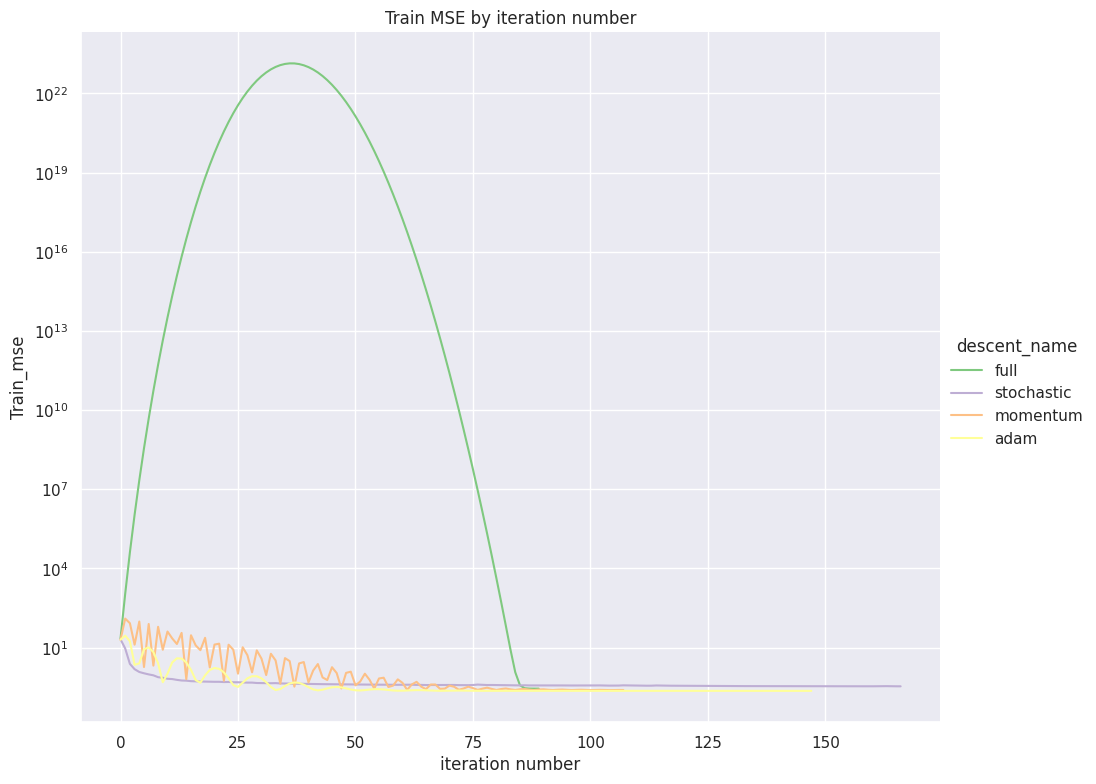

In [142]:
mse_per_iteration_on_train_relplot = sns.relplot(
    data=df_descent_iterations, x='iteration_number', y='mse_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

mse_per_iteration_on_train_relplot.set(title='Train MSE by iteration number',
                                       xlabel='iteration number',
                                       ylabel='Train_mse',
                                       yscale='log')
plt.subplots_adjust(top=0.95)
plt.show()

Тут улетевшая в 1e+23 ошибка Vanilla Gradient'а нам портит вид, поэтому кикнем её и построим ещё один график. А ещё всё рисуем в лог скейле, чтобы на чилле.

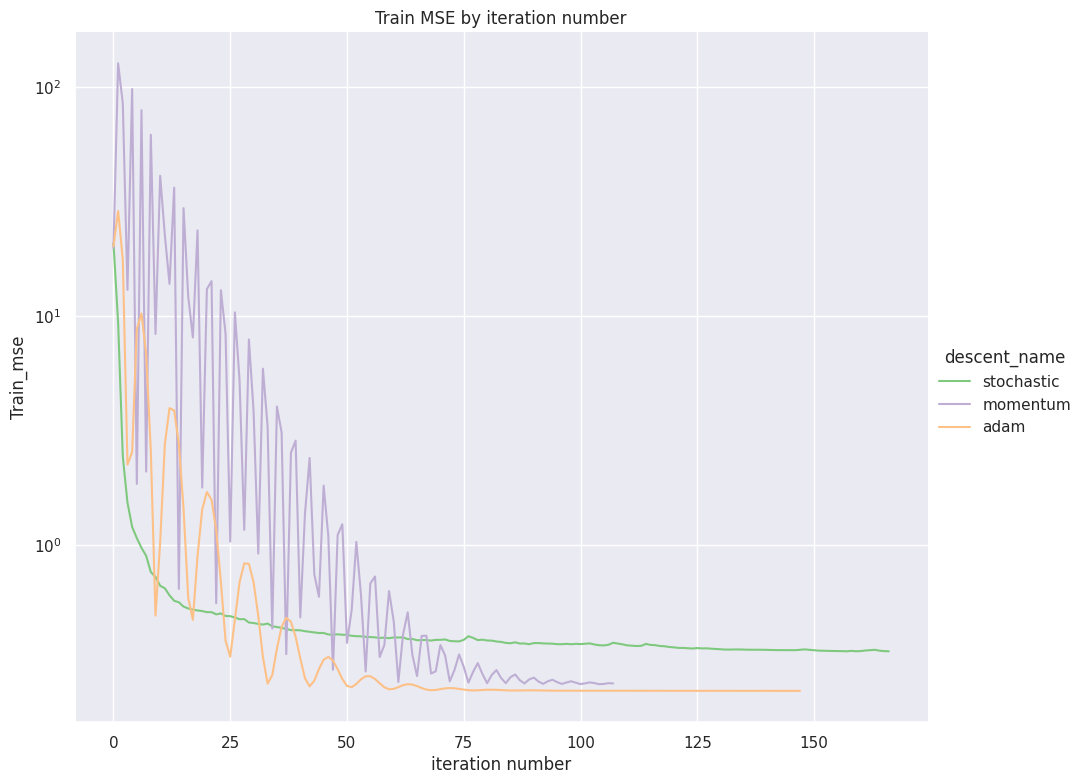

In [143]:
df_descent_iterations_without_full = df_descent_iterations.loc[df_descent_iterations['descent_name'] != 'full']

mse_per_iteration_on_train_relplot = sns.relplot(
    data=df_descent_iterations_without_full, x='iteration_number', y='mse_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

mse_per_iteration_on_train_relplot.set(title='Train MSE by iteration number',
                                       xlabel='iteration number',
                                       ylabel='Train_mse',
                                       yscale='log')
plt.subplots_adjust(top=0.95)
plt.show()

Время комментировать!

1. **Full VanillaGradient:** По ходу обучения ошибка улетает аж в 1e+23, вероятно у нас чересчур большой learning rate: видимо, на последних итерациях для lr = 1.83 модель обучилась немного лучше, но засчёт такого большого lr она случайно улетает в большие ошибки во время обучения. Если попробовать lr ещё больше, то мы наверняка даже не сойдёмся.

2. **SGD:** Стабильно и быстро уменьшает ошибку, поначалу работает лучше всех. Но по итогу он не может сойтись к меньшим значениям ошибки и выдаёт результат существенно хуже всех. Вероятно, стоит попробовать поменять batch_size с 50 по умолчанию на более высокие значения (не будем проскакивать минимум засчёт рассмотрения маленького батча).

3. **Momentum:** Сходится почти как Адам, но существенно медленнее Стохастика, причём ошибка между соседними итерациями на нём машет намного больше, чем у Адама. Изначально я запускал для модели с неизменёнными признаками, там сходимость у Моментума была медленнее, чем у Адама. С новыми признаками ошибки существенно упали, так ещё и на Адам временем раскошеливаться не нужно, я доволен) Но в целом крутой чувак и на сотой итерации близок к Адаму. Учитывая сложности вычисления обоих методов, Моментум мб предпочтительнее.

4. **Adam:** Даёт самые хорошие результаты, делает много итераций, сходясь к самому минимуму (как будто бы можно обрубить на 100 и ничего толком не потерять). Скачки MSE на первых десятках шагов достаточно размеренные, модель не меняет направление спуска кардинально каждый раз. Здесь чувствуется эффект нормализации по running метрикам.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [144]:
import time

batch_sizes = np.arange(5, 500, 10)
iterations_per_batch = 10

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': descent_stats['stochastic']['lambda_']
    }
}

df_sgd_batch_info = pd.DataFrame(columns=['batch_size', 'mean_time', 'mean_steps', 'mean_mse'])

for batch_size in batch_sizes:
    descent_config['kwargs']['batch_size'] = batch_size
    model = LinearRegression(descent_config=descent_config)
    sum_time, sum_steps, sum_mse = 0, 0, 0

    for i in range(iterations_per_batch):
        start_time = time.time()

        model = model.fit(X_train, y_train)
        score = model.calc_loss(X_val, y_val)

        sum_time += time.time() - start_time
        sum_steps += len(model.loss_history)
        sum_mse += score

    df_batch_info_row = pd.DataFrame({
        'batch_size' : batch_size,
        'mean_time' : sum_time / iterations_per_batch,
        'mean_steps' : sum_steps / iterations_per_batch,
        'mean_mse' : sum_mse / iterations_per_batch
    }, index=[0])

    df_sgd_batch_info = pd.concat([df_sgd_batch_info, df_batch_info_row])

df_sgd_batch_info.reset_index(drop=True, inplace=True)
df_sgd_batch_info

,batch_size,mean_time,mean_steps,mean_mse
0,5,0.153285,297.8,0.571188
1,15,0.135291,297.4,0.383518
2,25,0.156860,282.0,0.407120
3,35,0.179841,239.1,0.397641
4,45,0.116677,211.4,0.411317
5,55,0.098254,217.2,0.424653
6,65,0.121136,180.1,0.429694
7,75,0.101661,177.0,0.413582
8,85,0.118944,188.9,0.412552
9,95,0.117781,169.1,0.419938


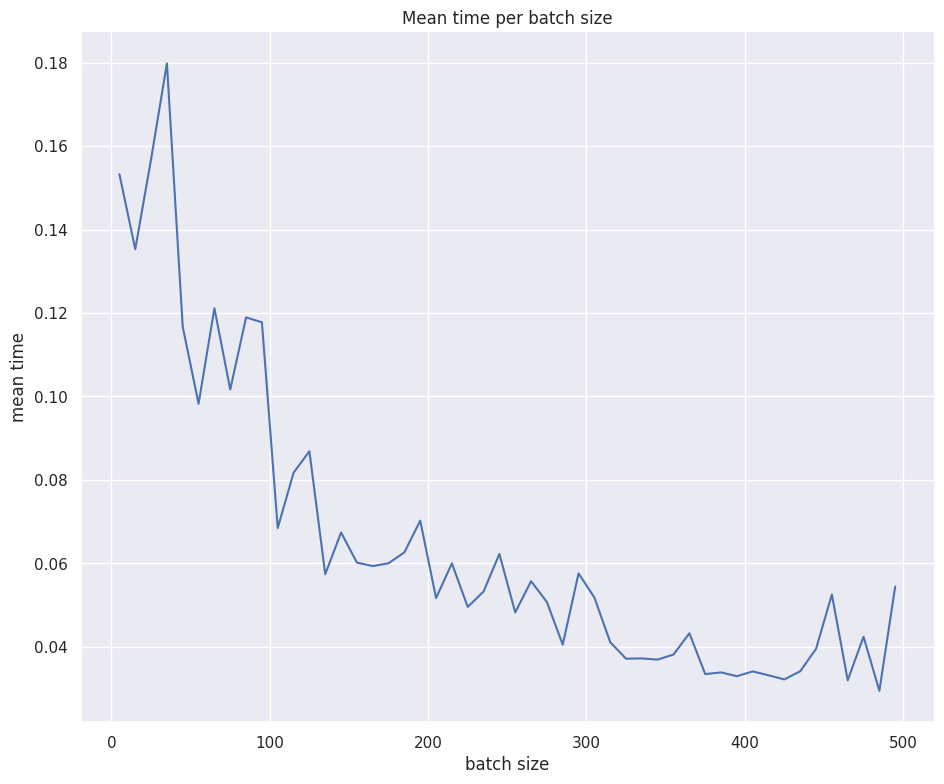

In [145]:
time_per_batch_size_relplot = sns.relplot(
    data=df_sgd_batch_info, x='batch_size', y='mean_time',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

time_per_batch_size_relplot.set(title='Mean time per batch size',
                                xlabel='batch size', ylabel='mean time')
plt.subplots_adjust(top=0.95)
plt.show()

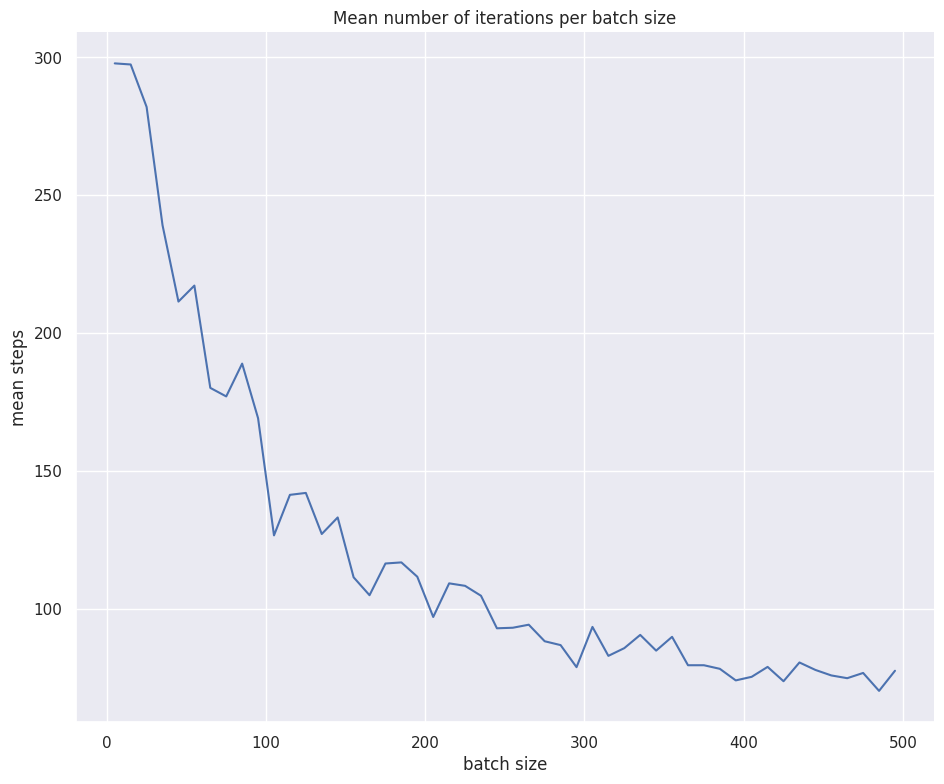

In [146]:
steps_per_batch_size_relplot = sns.relplot(
    data=df_sgd_batch_info, x='batch_size', y='mean_steps',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

steps_per_batch_size_relplot.set(title='Mean number of iterations per batch size',
                                 xlabel='batch size', ylabel='mean steps')
plt.subplots_adjust(top=0.95)
plt.show()

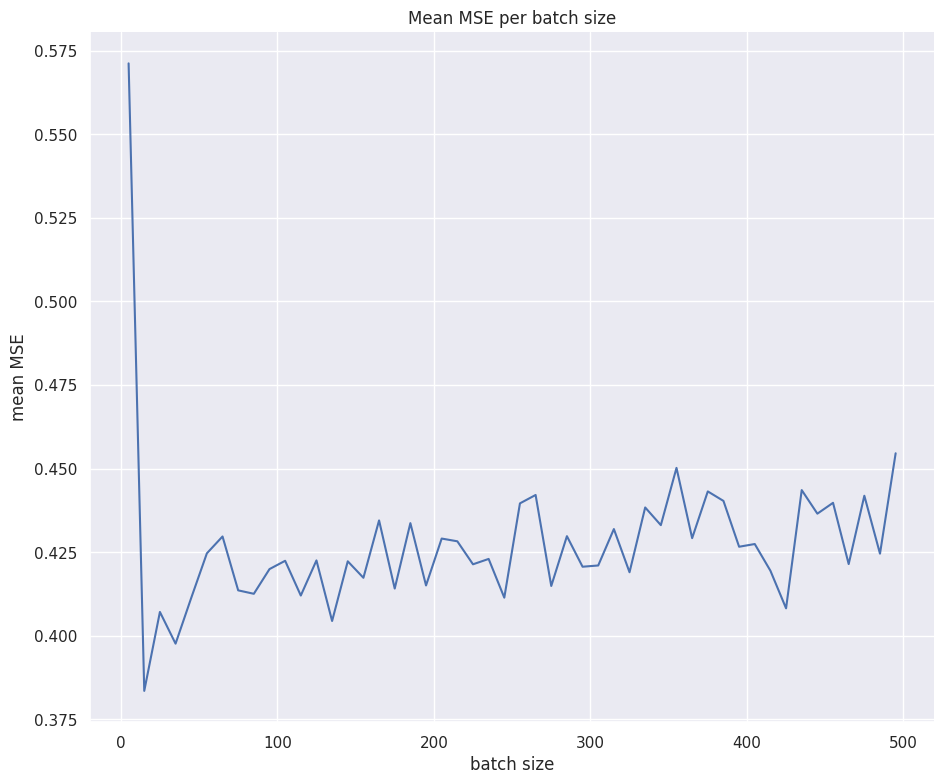

In [147]:
mse_per_batch_size_relplot = sns.relplot(
    data=df_sgd_batch_info, x='batch_size', y='mean_mse',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

mse_per_batch_size_relplot.set(title='Mean MSE per batch size',
                                 xlabel='batch size', ylabel='mean MSE')
plt.subplots_adjust(top=0.95)
plt.show()

In [148]:
import time

iterations_per_batch = 10

descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': descent_stats['full']['lambda_']
    }
}


model = LinearRegression(descent_config=descent_config)
sum_time, sum_steps, sum_mse = 0, 0, 0

for i in range(iterations_per_batch):
    start_time = time.time()

    model = model.fit(X_train, y_train)
    score = model.calc_loss(X_val, y_val)

    sum_time += time.time() - start_time
    sum_steps += len(model.loss_history)
    sum_mse += score

print('mean_time:', sum_time / iterations_per_batch)
print('mean_steps:', sum_steps / iterations_per_batch)
print('mean_mse:', sum_mse / iterations_per_batch)

mean_time: 0.17290334701538085
mean_steps: 99.0
mean_mse: 0.34733869375894605


## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/73230861/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [149]:
def grid_search_multiple(X_train, y_train, X_val, y_val, descent_config, param_names, param_grids):
    best_params = {}
    best_score = 1e9

    if len(param_names) == 1:
        param_name = param_names[0]
        for param in param_grids[param_name]:
            descent_config['kwargs'][param_name] = param

            model = LinearRegression(descent_config=descent_config)
            model = model.fit(X_train, y_train)
            score = model.calc_loss(X_val, y_val)

            if best_score > score:
                best_score = score
                best_params[param_name] = param

        return best_params, best_score

    param_name = param_names[0]
    for param in param_grids[param_name]:
        descent_config['kwargs'][param_name] = param
        best_other_params, best_other_score = grid_search_multiple(X_train, y_train, X_val, y_val,
                                                                   descent_config=descent_config,
                                                                   param_names=param_names[1:],
                                                                   param_grids=param_grids)

        if best_score > best_other_score:
            best_score = best_other_score
            best_params[param_name] = param

            for k, v in best_other_params.items():
                best_params[k] = v

    return best_params, best_score


descent_config = {
    'descent_name': '',
    'regularized': True,
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0,
        'mu': 0
    }
}

lambdas = np.logspace(-4, 1, 10)
mus = np.logspace(-6, 0, 10)
param_grids = {'lambda_' : lambdas, 'mu' : mus}

descent_reg_stats = dict()

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    print(f'Using {descent_name} regularized descent...')

    best_params, best_score = grid_search_multiple(X_train, y_train, X_val, y_val,
                                                   descent_config=descent_config,
                                                   param_names=['lambda_', 'mu'],
                                                   param_grids=param_grids)

    descent_config['kwargs']['lambda_'] = best_params['lambda_']
    descent_config['kwargs']['mu'] = best_params['mu']
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    mse_train = mean_squared_error(y_train_predict, y_train, squared=True)
    mse_test = mean_squared_error(y_test_predict, y_test, squared=True)
    r2_score_train = r2_score(y_train_predict, y_train)
    r2_score_test = r2_score(y_test_predict, y_test)

    print(f'Best lambda = {best_params["lambda_"]}')
    print(f'Best mu = {best_params["mu"]}.')
    print(f'MSE on train: {mse_train}')
    print(f'MSE on test: {mse_test}')
    print(f'R2Score on train: {r2_score_train}')
    print(f'R2Score on test: {r2_score_test}\n')

    descent_reg_stats[descent_name] = {
        'lambda_' : best_params['lambda_'],
        'mu' : best_params['mu'],
        'mse_train' : mse_train,
        'mse_test' : mse_test,
        'r2_score_train' : r2_score_train,
        'r2_score_test' : r2_score_test,
        'number_of_iterations' : len(model.loss_history),
        'mse_on_iterations' : model.loss_history
    }


Using full regularized descent...
Best lambda = 0.7742636826811278
Best mu = 0.046415888336127725.
MSE on train: 0.2745075734292408
MSE on test: 0.3214942647857691
R2Score on train: 0.7050603367038439
R2Score on test: 0.6534411179121076

Using stochastic regularized descent...
Best lambda = 0.7742636826811278
Best mu = 0.21544346900318823.
MSE on train: 0.2981519184248055
MSE on test: 0.34816231029786676
R2Score on train: 0.6128697888581068
R2Score on test: 0.5470136437235984

Using momentum regularized descent...
Best lambda = 0.7742636826811278
Best mu = 0.002154434690031882.
MSE on train: 0.24353349583141107
MSE on test: 0.2913136572607265
R2Score on train: 0.7527439013417541
R2Score on test: 0.7041908584145129

Using adam regularized descent...
Best lambda = 2.782559402207126
Best mu = 2.1544346900318823e-05.
MSE on train: 0.23110301369663022
MSE on test: 0.2797007700528538
R2Score on train: 0.7696453927994469
R2Score on test: 0.7212211432976978



In [150]:
for descent_name, descent_stat in descent_reg_stats.items():
    descent_name = descent_name + '_reg'
    for iteration_number, mse_on_iteration in enumerate(descent_stat['mse_on_iterations']):
        df_row = pd.DataFrame({
            'descent_name' : descent_name,
            'iteration_number' : iteration_number,
            'mse_on_iteration' : mse_on_iteration
        }, index=[0])
        df_descent_iterations = pd.concat([df_descent_iterations, df_row])

df_descent_iterations.reset_index(drop=True, inplace=True)
df_descent_iterations.shape

(1434, 3)

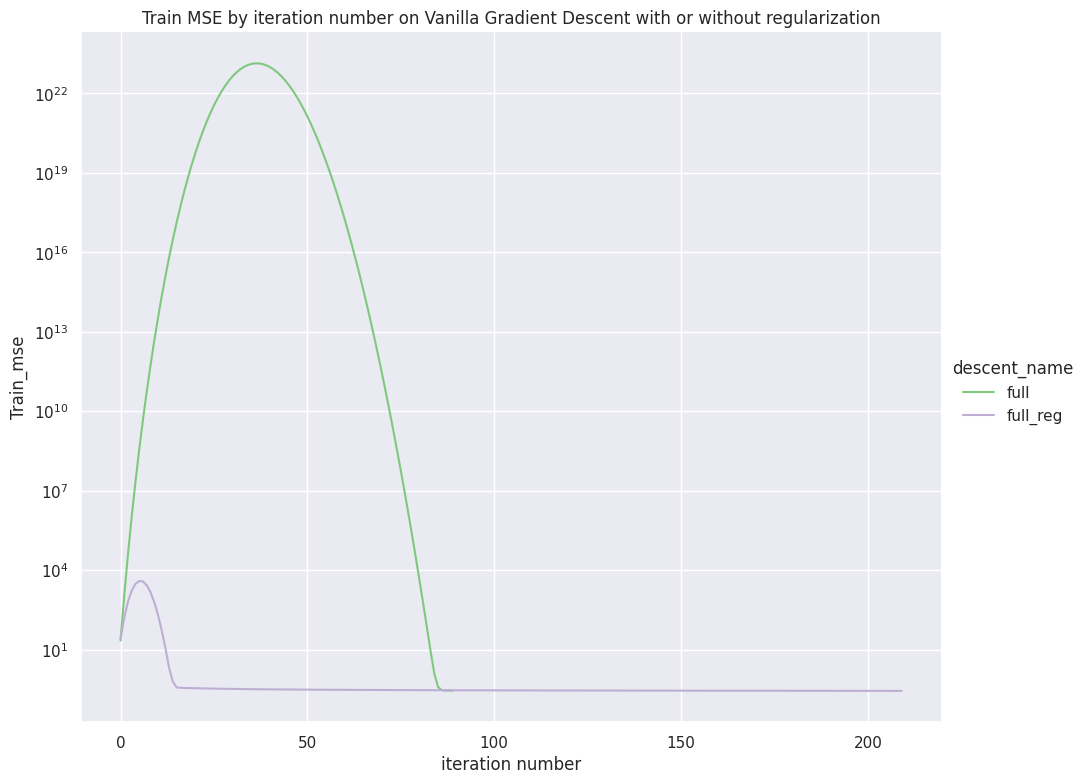

In [151]:
df_descent_iterations_full = df_descent_iterations.loc[
    (df_descent_iterations['descent_name'] == 'full') | \
    (df_descent_iterations['descent_name'] == 'full_reg')
]

mse_per_iteration_full_on_train_relplot = sns.relplot(
    data=df_descent_iterations_full, x='iteration_number', y='mse_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

mse_per_iteration_full_on_train_relplot.set(
    title='Train MSE by iteration number on Vanilla Gradient Descent with or without regularization',
    xlabel='iteration number', ylabel='Train_mse', yscale='log'
)

plt.subplots_adjust(top=0.95)
plt.show()

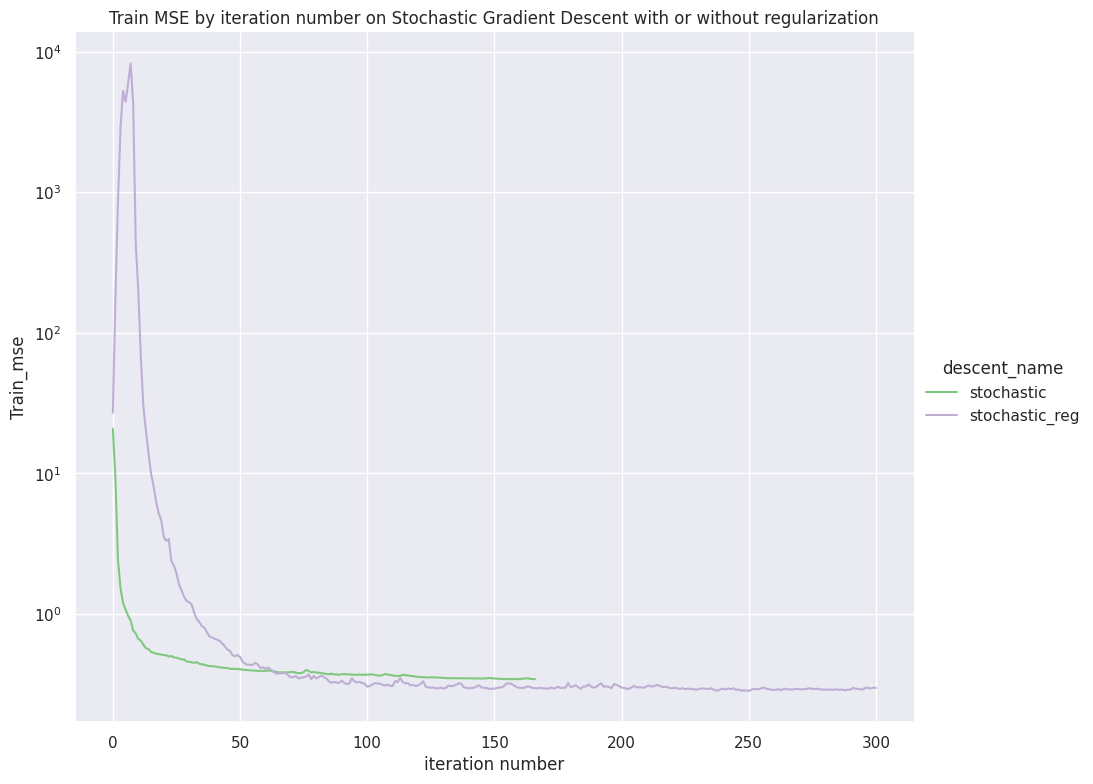

In [152]:
df_descent_iterations_stochastic = df_descent_iterations.loc[
    (df_descent_iterations['descent_name'] == 'stochastic') | \
    (df_descent_iterations['descent_name'] == 'stochastic_reg')
]

mse_per_iteration_stochastic_on_train_relplot = sns.relplot(
    data=df_descent_iterations_stochastic, x='iteration_number', y='mse_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

mse_per_iteration_stochastic_on_train_relplot.set(
    title='Train MSE by iteration number on Stochastic Gradient Descent with or without regularization',
    xlabel='iteration number', ylabel='Train_mse', yscale='log'
)

plt.subplots_adjust(top=0.95)
plt.show()

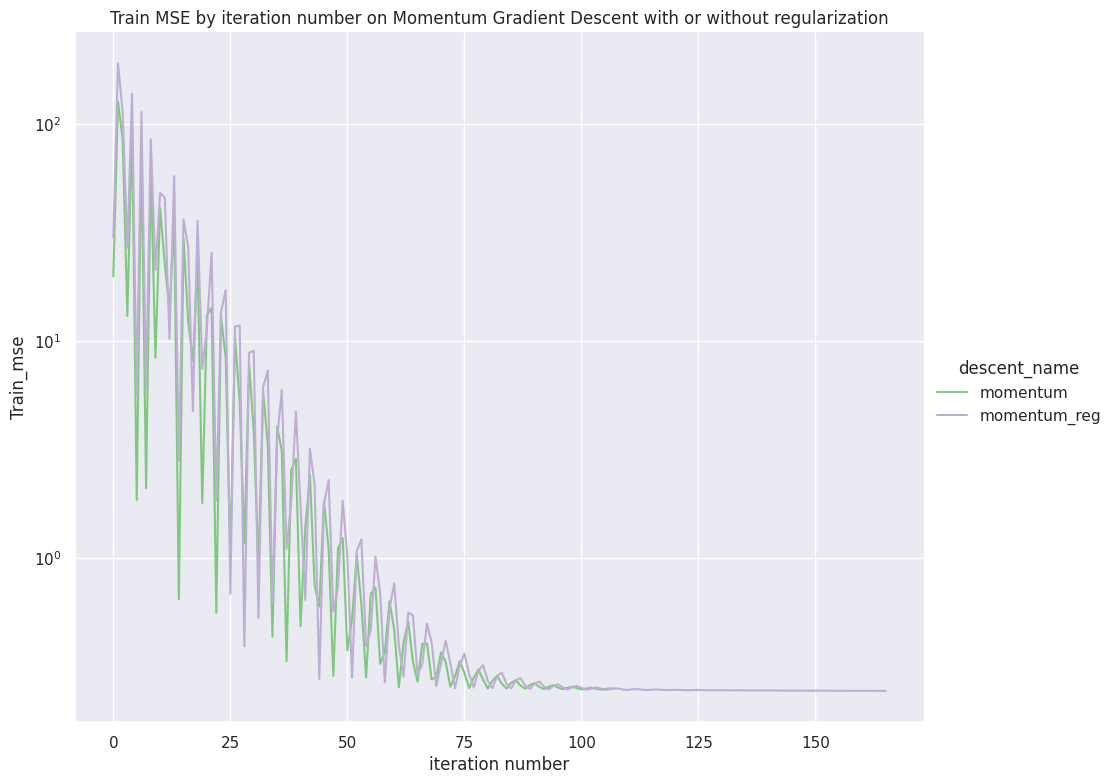

In [153]:
df_descent_iterations_momentum = df_descent_iterations.loc[
    (df_descent_iterations['descent_name'] == 'momentum') | \
    (df_descent_iterations['descent_name'] == 'momentum_reg')
]

mse_per_iteration_momentum_on_train_relplot = sns.relplot(
    data=df_descent_iterations_momentum, x='iteration_number', y='mse_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

mse_per_iteration_momentum_on_train_relplot.set(
    title='Train MSE by iteration number on Momentum Gradient Descent with or without regularization',
    xlabel='iteration number', ylabel='Train_mse', yscale='log'
)

plt.subplots_adjust(top=0.95)
plt.show()

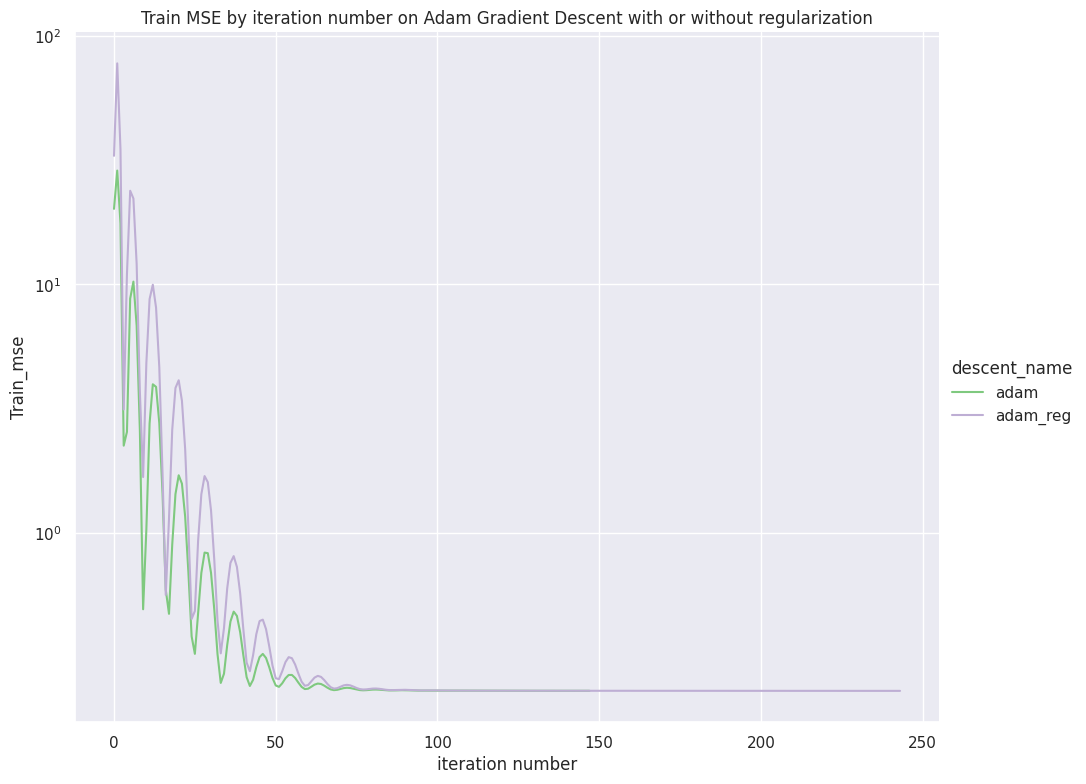

In [154]:
df_descent_iterations_adam = df_descent_iterations.loc[
    (df_descent_iterations['descent_name'] == 'adam') | \
    (df_descent_iterations['descent_name'] == 'adam_reg')
]

mse_per_iteration_adam_on_train_relplot = sns.relplot(
    data=df_descent_iterations_adam, x='iteration_number', y='mse_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

mse_per_iteration_adam_on_train_relplot.set(
    title='Train MSE by iteration number on Adam Gradient Descent with or without regularization',
    xlabel='iteration number', ylabel='Train_mse', yscale='log'
)

plt.subplots_adjust(top=0.95)
plt.show()

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a_i - y_i)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    \frac{\partial L(y, Xw)}{\partial w} = \frac{\partial \log \big( \cosh (Xw - y) \big)}{\partial w} =
    diag \bigg( \frac{2}{e^{Xw - y} + e^{y - Xw}} \bigg) \cdot diag \bigg( \frac{e^{Xw - y} + e^{y - Xw}}{2} \bigg) X \partial w =
    diag \bigg( \tanh \big( Xw - y \big) \bigg) \cdot X \partial w
$$

В нашем случае $Q(w) = \sum_i \log \big( \cosh (Xw - y) \big)$, а $\nabla_w Q(w) \in \mathbb{R}^{features}$ так что:
$$
   \big( \nabla_w Q(w) \big)^T = \sum_{i=0}^{b} \bigg( diag \big( \tanh (Xw - y) \big) \cdot X \bigg) =
   \big( \tanh (Xw - y) \big)^T \cdot X
$$
$$
    \nabla_w Q(w) = X^T \cdot \big( \tanh (Xw - y) \big)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.


In [155]:
from descents import LossFunction

descent_config = {
    'descent_name': '',
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.LogCosh,
        'lambda_': 0
    }
}

lambdas = np.logspace(-6, 1, 20)
descent_logcosh_stats = dict()

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    print(f'Using {descent_name} descent...')

    best_lambda, best_score = grid_search(X_train, y_train, X_val, y_val,
                                          descent_config=descent_config,
                                          param_name='lambda_',
                                          param_grid=lambdas)

    descent_config['kwargs']['lambda_'] = best_lambda
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train)

    logcosh_train = model.calc_loss(X_train, y_train)
    logcosh_test = model.calc_loss(X_test, y_test)
    r2_score_train = r2_score(model.predict(X_train), y_train)
    r2_score_test = r2_score(model.predict(X_test), y_test)

    print(f'Found best lambda = {best_lambda}.')
    print(f'LogCosh on train: {logcosh_train}')
    print(f'LogCosh on test: {logcosh_test}')
    print(f'R2Score on train: {r2_score_train}')
    print(f'R2Score on test: {r2_score_test}\n')

    descent_logcosh_stats[descent_name] = {
        'lambda_' : best_lambda,
        'logcosh_train' : logcosh_train,
        'logcosh_test' : logcosh_test,
        'r2_score_train' : r2_score_train,
        'r2_score_test' : r2_score_test,
        'number_of_iterations' : len(model.loss_history),
        'logcosh_on_iterations' : model.loss_history
    }


Using full descent...


/home/sergey/ml-course-hse/2022-fall/homeworks-practice/homework-practice-03-gd/descents.py:84: RuntimeWarning: overflow encountered in cosh
  return np.log(np.cosh(loss)).mean()


Found best lambda = 2.9763514416313192e-05.
LogCosh on train: 0.12194848378849027
LogCosh on test: 0.12880550632138338
R2Score on train: 0.7053121000649035
R2Score on test: 0.6600124008575886

Using stochastic descent...


/home/sergey/ml-course-hse/2022-fall/homeworks-practice/homework-practice-03-gd/descents.py:84: RuntimeWarning: overflow encountered in cosh
  return np.log(np.cosh(loss)).mean()


Found best lambda = 0.061584821106602544.
LogCosh on train: 0.11768107291238651
LogCosh on test: 0.12437818466180631
R2Score on train: 0.7391294304963234
R2Score on test: 0.6969163070238926

Using momentum descent...


/home/sergey/ml-course-hse/2022-fall/homeworks-practice/homework-practice-03-gd/descents.py:84: RuntimeWarning: overflow encountered in cosh
  return np.log(np.cosh(loss)).mean()


Found best lambda = 2.9763514416313192e-05.
LogCosh on train: 0.09767619302328762
LogCosh on test: 0.1046074167201195
R2Score on train: 0.7593743373064974
R2Score on test: 0.7121472153472577

Using adam descent...
Found best lambda = 10.0.
LogCosh on train: 0.09349902311357657
LogCosh on test: 0.10039367990422672
R2Score on train: 0.7716721334666198
R2Score on test: 0.7249542949629997



ЛогКошЛосс судя по R2-Score показывает себя получше, особенно яро это выражено на SGD - тот перестаёт отставать по точности от FullGD.

In [156]:
df_descent_logcosh_iterations = pd.DataFrame(
    columns=['descent_name', 'iteration_number', 'logcosh_on_iteration']
)

for descent_name, descent_stat in descent_logcosh_stats.items():
    descent_name = descent_name
    for iteration_number, logcosh_on_iteration in enumerate(descent_stat['logcosh_on_iterations']):
        df_row = pd.DataFrame({
            'descent_name' : descent_name,
            'iteration_number' : iteration_number,
            'logcosh_on_iteration' : logcosh_on_iteration
        }, index=[0])
        df_descent_logcosh_iterations = pd.concat([df_descent_logcosh_iterations, df_row])

df_descent_logcosh_iterations.reset_index(drop=True, inplace=True)
df_descent_logcosh_iterations.shape

(854, 3)

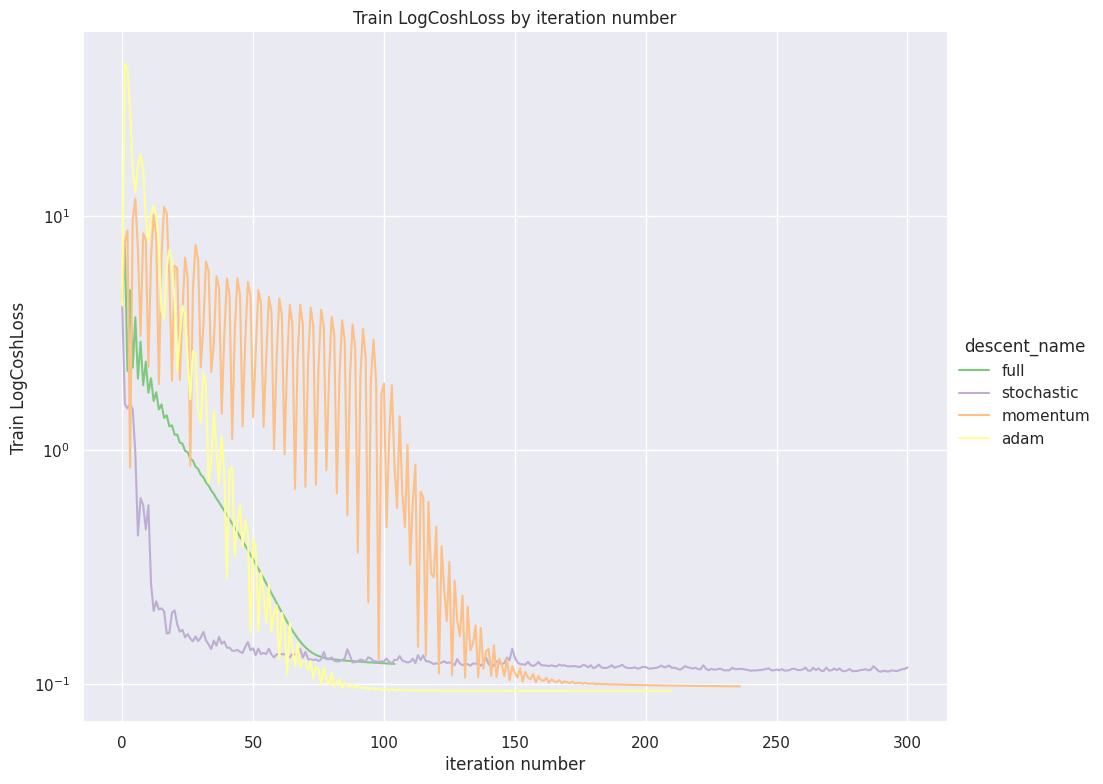

In [157]:
logcosh_per_iteration_on_train_relplot = sns.relplot(
    data=df_descent_logcosh_iterations, x='iteration_number', y='logcosh_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

logcosh_per_iteration_on_train_relplot.set(title='Train LogCoshLoss by iteration number',
                                       xlabel='iteration number',
                                       ylabel='Train LogCoshLoss',
                                       yscale='log')
plt.subplots_adjust(top=0.95)
plt.show()

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Я оч давно хотел сварить щщей, но на одного их варить было как-то грустно и муторно. А теперь мы живём вчетвером, и почему бы не забацать щи на всех.

N.B. я клоун
Куча флуда по адресу: https://t.me/schiiiiiiiii_1

<p float="left">
  <img src=щи2.jpg width="600" />
  <img src=щи1.jpg width="600" />
</p>

P.S. СУПЫ СУПЫ СУПЫ СУПЫ. ПРЕДЛОЖИ, КАКОЙ СЛЕДУЮЩИМ ГОТОВИТЬ

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [158]:
from descents import LossFunction

descent_config = {
    'descent_name': 'adamax',
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.LogCosh,
        'lambda_': 0
    }
}

lambdas = np.logspace(-3, 3, 20)
descent_logcosh_stats = dict()

print('Using AdaMax descent...')

best_lambda, best_score = grid_search(X_train, y_train, X_val, y_val,
                                      descent_config=descent_config,
                                      param_name='lambda_',
                                      param_grid=lambdas)

descent_config['kwargs']['lambda_'] = best_lambda
model = LinearRegression(descent_config=descent_config)
model.fit(X_train, y_train)

logcosh_train = model.calc_loss(X_train, y_train)
logcosh_test = model.calc_loss(X_test, y_test)
r2_score_train = r2_score(model.predict(X_train), y_train)
r2_score_test = r2_score(model.predict(X_test), y_test)

print(f'Found best lambda = {best_lambda}.')
print(f'LogCosh on train: {logcosh_train}')
print(f'LogCosh on test: {logcosh_test}')
print(f'R2Score on train: {r2_score_train}')
print(f'R2Score on test: {r2_score_test}\n')

descent_logcosh_stats[descent_name] = {
    'lambda_' : best_lambda,
    'logcosh_train' : logcosh_train,
    'logcosh_test' : logcosh_test,
    'r2_score_train' : r2_score_train,
    'r2_score_test' : r2_score_test,
    'number_of_iterations' : len(model.loss_history),
    'logcosh_on_iterations' : model.loss_history
}

Using AdaMax descent...
Found best lambda = 483.2930238571752.
LogCosh on train: 0.09614077688690613
LogCosh on test: 0.10310564026605466
R2Score on train: 0.7637883396769651
R2Score on test: 0.7171473900919099



Результат чуть похуже Адама, что и требовалось ожидать, так как метод не такой перегруженный засчёт $l_{\infty}$ нормы.

Имеет место быть.

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

$$
    MAE(y, a) = |a - y|
$$
$$
    Q(w) = \frac{1}{n} | Xw - y | \, ;
    \quad
    \nabla_w Q(w) = \frac{1}{n} X^T \cdot sign(Xw - y)
$$

Теперь для Хубер-Лосса:

$$
    Huber_{\delta}(y, a) =
    \begin{cases}
        \frac{1}{2} (y - a)^2 \, , \; for \; |y - a| \leq \delta\\
        \delta \cdot ( |y - a| - \frac{\delta}{2} ) \, , \; otherwise
    \end{cases}
$$
$$
    Q(w) =
    \begin{cases}
        \frac{1}{2n} (y - Xw)^T (y - Xw) \, , \; for \; |y - Xw| \leq \delta\\
        \frac{\delta}{n} \cdot |y - Xw| - \frac{\delta^2}{2n} \, , \; otherwise
    \end{cases}
    \, ; \quad
    \nabla_w Q(w) =
    \begin{cases}
        \frac{1}{n} \cdot X^T (Xw - y) \, , \; for \; |y - Xw| \leq \delta \\
        \frac{\delta}{n} \cdot X^T sign(Xw - y) \, , \; otherwise
    \end{cases}
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [159]:
from descents import LossFunction

descent_config = {
    'descent_name': '',
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.MAE,
        'lambda_': 0
    }
}

lambdas = np.logspace(-6, 1, 20)
descent_mae_stats = dict()

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    print(f'Using {descent_name} descent...')

    best_lambda, best_score = grid_search(X_train, y_train, X_val, y_val,
                                          descent_config=descent_config,
                                          param_name='lambda_',
                                          param_grid=lambdas)

    descent_config['kwargs']['lambda_'] = best_lambda
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train)

    mae_train = model.calc_loss(X_train, y_train)
    mae_test = model.calc_loss(X_test, y_test)
    r2_score_train = r2_score(model.predict(X_train), y_train)
    r2_score_test = r2_score(model.predict(X_test), y_test)

    print(f'Found best lambda = {best_lambda}.')
    print(f'MAE on train: {mae_train}')
    print(f'MAE on test: {mae_test}')
    print(f'R2Score on train: {r2_score_train}')
    print(f'R2Score on test: {r2_score_test}\n')

    descent_mae_stats[descent_name] = {
        'lambda_' : best_lambda,
        'mae_train' : mae_train,
        'mae_test' : mae_test,
        'r2_score_train' : r2_score_train,
        'r2_score_test' : r2_score_test,
        'number_of_iterations' : len(model.loss_history),
        'mae_on_iterations' : model.loss_history
    }


Using full descent...
Found best lambda = 4.281332398719387.
MAE on train: 0.3575083279647733
MAE on test: 0.36389913942308694
R2Score on train: 0.7229022686448472
R2Score on test: 0.6760807486621536

Using stochastic descent...
Found best lambda = 1.8329807108324339.
MAE on train: 0.36583816639497574
MAE on test: 0.3718233035723692
R2Score on train: 0.6952759350487667
R2Score on test: 0.6525456812807351

Using momentum descent...
Found best lambda = 4.281332398719387.
MAE on train: 0.3235572831166746
MAE on test: 0.3301731713313741
R2Score on train: 0.7517717854599586
R2Score on test: 0.7048785420365903

Using adam descent...
Found best lambda = 4.281332398719387.
MAE on train: 0.3198779527231254
MAE on test: 0.32657133860015625
R2Score on train: 0.7573517903143075
R2Score on test: 0.7104074360720996



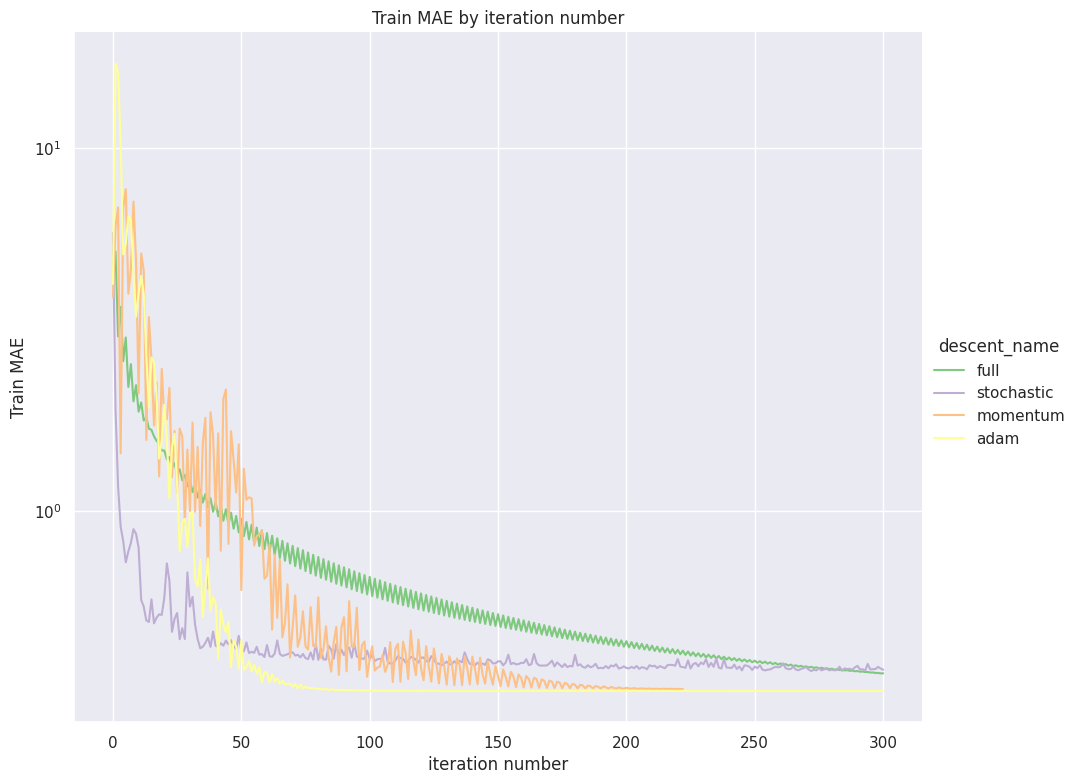

In [160]:
df_descent_mae_iterations = pd.DataFrame(
    columns=['descent_name', 'iteration_number', 'mae_on_iteration']
)

for descent_name, descent_stat in descent_mae_stats.items():
    descent_name = descent_name
    for iteration_number, mae_on_iteration in enumerate(descent_stat['mae_on_iterations']):
        df_row = pd.DataFrame({
            'descent_name' : descent_name,
            'iteration_number' : iteration_number,
            'mae_on_iteration' : mae_on_iteration
        }, index=[0])
        df_descent_mae_iterations = pd.concat([df_descent_mae_iterations, df_row])

df_descent_mae_iterations.reset_index(drop=True, inplace=True)

mae_per_iteration_on_train_relplot = sns.relplot(
    data=df_descent_mae_iterations, x='iteration_number', y='mae_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

mae_per_iteration_on_train_relplot.set(title='Train MAE by iteration number',
                                       xlabel='iteration number',
                                       ylabel='Train MAE',
                                       yscale='log')
plt.subplots_adjust(top=0.95)
plt.show()

МАЕ показывает себя существенно лучше на SGD в сравнении с MSE (видимо, с меньшей tolerance дела у MSE пошли бы получше даже на небольших батчах), но еще не на уровне крутости LogCosh. Вполне логично, учитывая то, что ЛогКош - попытка оптимизировать и MSE, и MAE.

In [161]:
from descents import LossFunction

descent_config = {
    'descent_name': '',
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.Huber,
        'lambda_': 0
    }
}

lambdas = np.logspace(-6, 1, 20)
descent_huber_stats = dict()

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    print(f'Using {descent_name} descent...')

    best_lambda, best_score = grid_search(X_train, y_train, X_val, y_val,
                                          descent_config=descent_config,
                                          param_name='lambda_',
                                          param_grid=lambdas)

    descent_config['kwargs']['lambda_'] = best_lambda
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train)

    huber_train = model.calc_loss(X_train, y_train)
    huber_test = model.calc_loss(X_test, y_test)
    r2_score_train = r2_score(model.predict(X_train), y_train)
    r2_score_test = r2_score(model.predict(X_test), y_test)

    print(f'Found best lambda = {best_lambda}.')
    print(f'HuberLoss on train: {huber_train}')
    print(f'HuberLoss on test: {huber_test}')
    print(f'R2Score on train: {r2_score_train}')
    print(f'R2Score on test:s {r2_score_test}\n')

    descent_huber_stats[descent_name] = {
        'lambda_' : best_lambda,
        'huber_train' : huber_train,
        'huber_test' : huber_test,
        'r2_score_train' : r2_score_train,
        'r2_score_test' : r2_score_test,
        'number_of_iterations' : len(model.loss_history),
        'huber_on_iterations' : model.loss_history
    }


Using full descent...
Found best lambda = 10.0.
HuberLoss on train: 0.13039569539610152
HuberLoss on test: 0.14001885880956028
R2Score on train: 0.7232209469858087
R2Score on test:s 0.6742383161122653

Using stochastic descent...
Found best lambda = 4.281332398719387.
HuberLoss on train: 0.12809561744470124
HuberLoss on test: 0.13793148260110386
R2Score on train: 0.7340382960220139
R2Score on test:s 0.6861660263071505

Using momentum descent...
Found best lambda = 4.281332398719387.
HuberLoss on train: 0.1133014144672821
HuberLoss on test: 0.12305969861771662
R2Score on train: 0.760151127285128
R2Score on test:s 0.7133240658041234

Using adam descent...
Found best lambda = 4.281332398719387.
HuberLoss on train: 0.10800715099074887
HuberLoss on test: 0.11760649454557742
R2Score on train: 0.7731961859052143
R2Score on test:s 0.7265428276034218



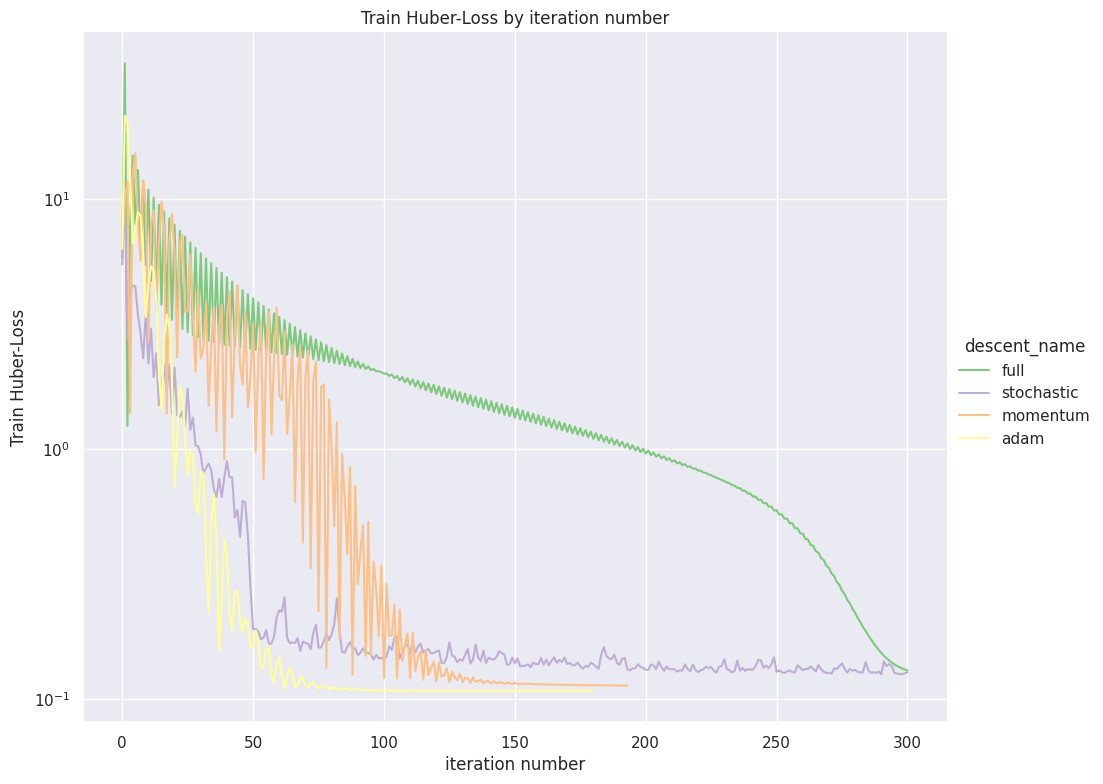

In [162]:
df_descent_huber_iterations = pd.DataFrame(
    columns=['descent_name', 'iteration_number', 'huber_on_iteration']
)

for descent_name, descent_stat in descent_huber_stats.items():
    descent_name = descent_name
    for iteration_number, huber_on_iteration in enumerate(descent_stat['huber_on_iterations']):
        df_row = pd.DataFrame({
            'descent_name' : descent_name,
            'iteration_number' : iteration_number,
            'huber_on_iteration' : huber_on_iteration
        }, index=[0])
        df_descent_huber_iterations = pd.concat([df_descent_huber_iterations, df_row])

df_descent_huber_iterations.reset_index(drop=True, inplace=True)

huber_per_iteration_on_train_relplot = sns.relplot(
    data=df_descent_huber_iterations, x='iteration_number', y='huber_on_iteration', hue='descent_name',
    kind='line', height=8, aspect=1.2, palette='Accent',
)

huber_per_iteration_on_train_relplot.set(title='Train Huber-Loss by iteration number',
                                         xlabel='iteration number',
                                         ylabel='Train Huber-Loss',
                                         yscale='log')
plt.subplots_adjust(top=0.95)
plt.show()

Huber ожидаемо показывает точность чуть лучше, чем MAE, но не то что бы стоит особо париться. В целом HuberLoss и LogCosh хороши, как улучшения MSE + MAE. Но в целом можно забить на это и использовать MAE, которая лучше хэндлит выбросы.

Классная домаха кста, как обычно